In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import numpy as np
import pandas as pd

In [164]:
dataset = pd.read_csv('/content/drive/MyDrive/NNFLL/weatherHistory.csv')

In [165]:
dataset.head(2)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,snow,-0.827778,-0.827778,1.0,2.4955,1.0465,1027.68,NaN,NaN,NaN,NaN,NaN,NaN
1,snow,-1.577778,-3.972222,1.0,6.3756,0.3220,1027.93,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
X = dataset.iloc[ :,[1, 2, 3,4,5,6]].values
y = dataset.iloc[ :, 0].values

In [167]:
X.shape

(999, 6)

In [168]:
y.shape

(999,)

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y[0:] = le.fit_transform(y[0:])

In [170]:
X

array([[-8.27777778e-01, -8.27777778e-01,  1.00000000e+00,
         2.49550000e+00,  1.04650000e+00,  1.02768000e+03],
       [-1.57777778e+00, -3.97222222e+00,  1.00000000e+00,
         6.37560000e+00,  3.22000000e-01,  1.02793000e+03],
       [-1.01666667e+00, -3.80000000e+00,  1.00000000e+00,
         7.64750000e+00,  1.41680000e+00,  1.02772000e+03],
       ...,
       [ 0.00000000e+00, -4.75000000e+00,  1.00000000e+00,
         1.70016000e+01,  1.93200000e+00,  9.98510000e+02],
       [ 0.00000000e+00, -4.15555556e+00,  1.00000000e+00,
         1.37655000e+01,  1.98030000e+00,  9.99290000e+02],
       [ 7.77777780e-02, -4.00000000e+00,  9.90000000e-01,
         1.34757000e+01,  2.14130000e+00,  9.99760000e+02]])

In [171]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,0.0,0.0,0.0,0.0,0.0
mean,0.511717,-2.645768,0.872302,11.257446,8.194642,1018.618909,NaN,NaN,NaN,NaN,NaN
std,3.540866,4.074714,0.094227,4.817713,4.270617,7.790462,NaN,NaN,NaN,NaN,NaN
min,-10.133333,-12.727778,0.230000,0.000000,0.000000,992.170000,NaN,NaN,NaN,NaN,NaN
25%,-1.336111,-4.833333,0.830000,9.354100,5.570600,1018.885000,NaN,NaN,NaN,NaN,NaN
50%,0.305556,-2.811111,0.890000,10.400600,8.033900,1020.000000,NaN,NaN,NaN,NaN,NaN
75%,2.455556,-0.711111,0.940000,13.443500,9.982000,1020.610000,NaN,NaN,NaN,NaN,NaN
max,25.994444,25.994444,1.000000,30.751000,16.100000,1038.010000,NaN,NaN,NaN,NaN,NaN


In [172]:
dataset['Precip Type'].value_counts()

0    551
1    448
Name: Precip Type, dtype: int64

In [173]:
dataset.groupby('Precip Type').mean()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Precip Type,,,,,,,,,,,
0,2.781498,-0.123483,0.869782,11.708937,8.209656,1018.200708,NaN,NaN,NaN,NaN,NaN
1,-2.279911,-5.747954,0.875402,10.702152,8.176177,1019.133259,NaN,NaN,NaN,NaN,NaN


In [174]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [175]:
X

array([[0.25757343, 0.30731707, 1.        , 0.08115183, 0.065     ,
        0.77465096],
       [0.23681378, 0.22611191, 1.        , 0.20732984, 0.02      ,
        0.78010471],
       [0.25234507, 0.23055954, 1.        , 0.2486911 , 0.088     ,
        0.77552356],
       ...,
       [0.28048593, 0.20602583, 1.        , 0.55287958, 0.12      ,
        0.13830716],
       [0.28048593, 0.22137733, 1.        , 0.44764398, 0.123     ,
        0.15532286],
       [0.28263878, 0.22539455, 0.98701299, 0.4382199 , 0.133     ,
        0.16557592]])

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=2)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [177]:
X_train.shape

(799, 6)

In [178]:
y_train.shape

(799,)

In [179]:
X_test.shape

(200, 6)

In [180]:
y_test.shape

(200,)

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [182]:
# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                70        
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [184]:
history = model.fit(X_train,y_train,epochs=100, batch_size=42)

Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6775 - accuracy: 0.6708
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6583
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6608
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6446
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.6370
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6683
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6758
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.7234
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7046
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.6871
Epoch 11/

In [185]:
acc = history.history['accuracy']
loss = history.history['loss']

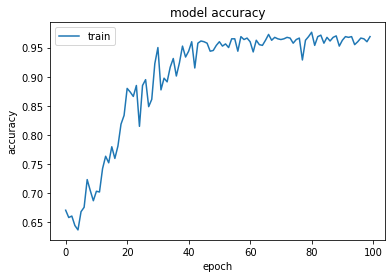

<Figure size 432x288 with 0 Axes>

In [186]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

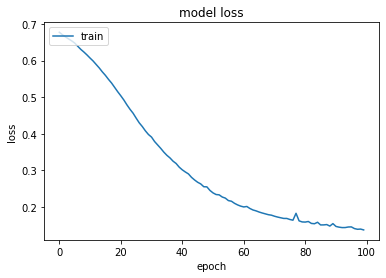

<Figure size 432x288 with 0 Axes>

In [187]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [188]:
history_test = model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9850


In [189]:
history_test

[0.11620499938726425, 0.9850000143051147]

In [190]:
classifier = Sequential()

In [191]:
y_pred = classifier.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [192]:
y_pred

array([[0.35460556, 0.31764707, 0.7922078 , 0.37277487, 0.426     ,
        0.59031415],
       [0.12932493, 0.18766141, 0.8961039 , 0.15445027, 0.429     ,
        0.633726  ],
       [0.2162079 , 0.16786227, 0.96103895, 0.3434555 , 0.164     ,
        0.90575916],
       ...,
       [0.07934799, 0.        , 0.9350649 , 0.40732986, 0.155     ,
        0.27945027],
       [0.3573735 , 0.3164993 , 0.84415585, 0.39895287, 1.        ,
        0.5122164 ],
       [0.24081193, 0.17804877, 0.53246754, 0.4366492 , 0.632     ,
        0.7988656 ]], dtype=float32)

In [193]:
y_test

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [194]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  
f1 = f1_score(y_test, y_pred, average='micro')

7/7 [==============================] - 0s 5ms/step


In [195]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [196]:
print(cm)

[[100   1]
 [  2  97]]


In [197]:
print(ac)

0.985


In [198]:
from sklearn.metrics import classification_report

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       101
         1.0       0.99      0.98      0.98        99

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

